# Báo cáo Project
Lớp TTNT-162297, Nhóm G09

## 1. Thông tin chung

### Thành viên  

- Lê Tiến Thịnh 20235225 

- Lê Mạnh Hùng 20235096 

- Lê Kim Tính 20235230 

- Nguyễn Hữu Dũng 20235052 


### Lịch thực hiện
- W02: Đăng ký nhóm 
- W03: Đề xuất project (28/9)
- W08: Báo cáo tiến độ giữa kỳ (1/11)
- W15: Hoàn thành và gửi báo cáo project (20/12)
- W16-18: Trình bày project, Q&A

## 2. Đề xuất project (W3)

### Bài toán
- Bài toán: Xây dựng chương trình AI cờ Caro: 

- Mô tả luật chơi:

    Bàn cờ 10x10

    Cờ Caro - trò chơi chiến thuật trên bàn cờ ô vuông, trong đó có 1 người dùng chơi trực tiếp với máy lần lượt đánh dấu quân cờ (X/O).  

    Mục tiêu là tạo thành một dãy 5 quân liên tiếp theo hàng ngang, hàng dọc hoặc đường chéo. 

- 3 chế độ chơi sử dụng 3 thuật toán AI: Heristic, Minimax, Minimax (sử dụng cắt tỉa alpha-beta)

- Mục tiêu là so sánh hiệu năng và chất lượng quyết định của ba thuật toán.

### Phương pháp

#### 1. Mô Hình Hóa Bàn Cờ

Bàn cờ: **ma trận 2D (10×10)** với giá trị:
- 0: ô trống | 1: quân người (X) | -1: quân AI (O)


#### 2. Ràng Buộc (Điều Kiện Kết Thúc)

Trò chơi kết thúc khi:
- **Thắng/Thua**: Có 5 quân liên tiếp (ngang, dọc, chéo)
- **Hoà**: Bàn cờ đầy mà không có người thắng

#### 3. Cách tính điểm

Tính điểm cho mỗi "cửa sổ" 5 ô liên tiếp:

Sau đó tổng hợp điểm của tất cả "cửa sổ" của bàn cờ để hình thành điểm đánh giá trạng thái bàn cờ:

#### 4. Các mô hình AI

##### Chế độ Heristic

**Ý tưởng**: Chọn nước **tốt nhất hiện tại** dựa trên heuristic, không tìm kiếm sâu:
- Với mỗi nước tiềm năng: tính điểm nếu AI đặt (điểm tấn công) - điểm nếu người chơi đặt (điểm phòng thủ)
- Chọn nước có điểm tổng cao nhất

##### Chế Độ Minimax (Tìm Kiếm Min-Max)

**Ý tưởng**: Tìm kiếm **cây trò chơi đến độ sâu cố định**, chọn nước **tốt nhất**:


##### Chế Độ Alpha-Beta

**Ý tưởng**: Cải tiến Minimax bằng **cắt bỏ nhánh vô ích** mà không ảnh hưởng kết quả:

### Phân công


| Họ và tên        | MSSV    | Nhiệm vụ                                                                 |
|------------------|---------|--------------------------------------------------------------------------|
| Nguyễn Hữu Dũng  | 20235052| Kiểm thử và trình bày sản phẩm, so sánh thuật toán         |
| Lê Mạnh Hùng     | 20235096| Xây dựng hàm đánh giá Heuristic, xây dựng giao diện                                                |
| Lê Kim Tính      | 20235230| Xây dựng thuật toán Minimax      |
| Lê Tiến Thịnh    | 20235225| Xây dựng thuật toán Alpha-beta   |



### Chương trình
Nhóm đã hoàn thiện phần khung chương trình và một số chức năng cốt lõi để có thể chơi thử và đánh giá AI ở mức cơ bản. Cụ thể:

- **Kiến trúc dự án:**
  - `board.py`: Lớp `Board` hiện đã triển khai cách lưu trữ bàn cờ (ma trận 2D), hàm `makeMove(row, col, symbol)` để đặt quân, và `check_winner()` để kiểm tra thắng theo quy tắc 5 liên tiếp (kiểm tra theo hàng, cột và hai đường chéo).
  - `game_manager.py`: Quản lý vòng chơi console (Human vs AI), sử dụng `Player` để nhập nước đi và gọi AI để lấy nước đi của máy.
  - `player.py`: Lớp `Player` xử lý nhập liệu cho người chơi trong chế độ console.
  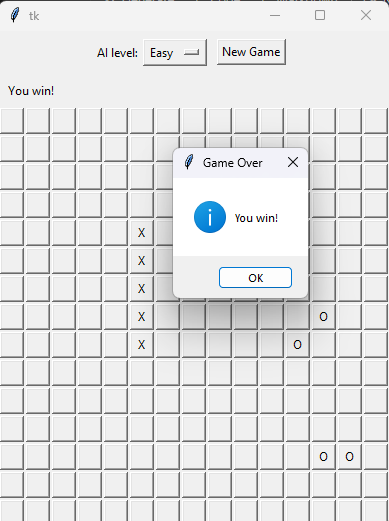

- **Giao diện người dùng:**
  - `tk_gui.py` + `gui_components.py`: Giao diện đồ họa bằng Tkinter đã được xây dựng. Giao diện hiển thị lưới 15×15, cho phép người dùng click để đặt quân, có nhãn trạng thái và nút *New Game*.
  - `thread_worker.py`: Chạy AI trong một thread nền để tránh treo GUI khi AI tính toán.
  - `run_gui.py`: Entrypoint khởi chạy GUI; `main.py` ưu tiên chạy GUI và fallback về console nếu không thể load.
  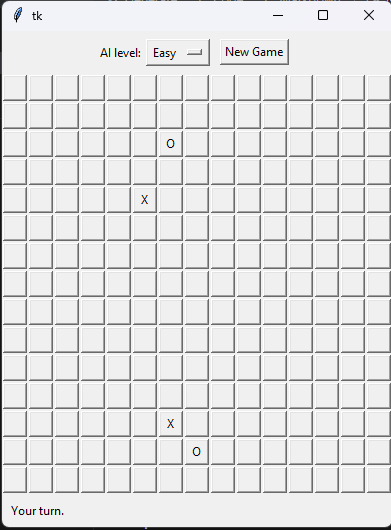

- **AI:**
  - `ai_easy.py`: AI mức dễ, chọn ngẫu nhiên một ô trống (đã hoàn thành và tích hợp).
  - `status_asses.py`: Đánh giá trạng thái bàn cờ (heuristic) phục vụ cho AI mức trung bình.
  - `ai_medium.py`: đang hoàn thiện
  - `ai_hard.py`: đang hoàn thiện


## 4. Cập nhật kết quả cuối kỳ (W15)

#### Hàm Đánh Giá & Nước Đi Tiềm Năng

**Hàm đánh giá trạng thái**: Tính điểm từng "cửa sổ" 5 ô liên tiếp theo các tiêu chí:

**Công thức tính điểm của 1 "cửa sổ":**

 | Điều Kiện | Điểm |
|-----------|------|
| 5 quân AI liên tiếp | +1,000,000 |
 | 4 quân AI + 1 ô trống | +10,000 |
| [0, AI, AI, AI, 0] | +5,000 |
| AI, AI, AI + 2 ô trống | +500 |
| 2 quân AI + 3 ô trống | +100 |
| 1 quân AI + 4 ô trống | +1 |
|------------------------------|
| 5 quân Người liên tiếp | -1,000,000 |
| 4 quân Người + 1 ô trống | -80,000 |
| [0, Người, Người, Người, 0] | -40,000 |
| Người, Người, Người + 2 ô trống | -2,000 |
| 2 quân Người + 3 ô trống | -200 |

**Cách tính điểm trạng thái bàn cờ**:
- Quét tất cả "cửa sổ" 5 ô theo 4 hướng (ngang, dọc, chéo chính, chéo phụ)
- Tính điểm tấn công = tổng điểm nếu AI đặt ở ô đó
- Tính điểm phòng thủ = tổng điểm nếu Người chơi đặt ở ô đó
- **Điểm nước đi cuối cùng = điểm tấn công - điểm phòng thủ**

**Nước đi tiềm năng**: Chỉ xét ô lân cận (khoảng cách ≤ 1) với quân đã đặt → giảm từ ~100 xuống ~10-20 ô, cải thiện hiệu năng tính toán

##### 1. Thuật Toán Heuristic (Tham Lam)

**Nguyên tắc:**
- Không tìm kiếm sâu, chỉ xét nước đi hiện tại
- Với mỗi nước tiềm năng: tính điểm tấn công (nếu AI đặt) và phòng thủ (nếu đối thủ đặt)
- Chọn nước có **điểm tấn công - điểm phòng thủ** lớn nhất

**Ưu điểm:**
-  Nhanh, phản ứng tức thì
  
**Nhược điểm:**
- Thiếu tầm nhìn dài hạn

##### 2. Thuật Toán Minimax

**Nguyên tắc:**

Minimax là thuật toán tìm kiếm trên cây trò chơi, dựa trên giả định:
- **AI (tầng Max)**: Cố gắng **tối đa hóa** điểm số
- **Người (tầng Min)**: Cố gắng **tối thiểu hóa** điểm số

**Quá trình hoạt động:**
```
Tại nút gốc (Max - lượt AI):
  ├─ Thử nước đi 1 (trạng thái)
  │  └─ Tại tầng Min (lượt người):
  │     ├─ Thử nước đi 1.1
  │     │  └─ Tính điểm... = A
  │     ├─ Thử nước đi 1.2
  │     │  └─ Tính điểm... = B
  │     └─ Chọn min(A, B) = C1
  ├─ Thử nước đi 2 (trạng thái)
  │  └─ Tại tầng Min:
  │     ├─ Thử nước đi 2.1
  │     │  └─ Tính điểm... = D
  │     ├─ Thử nước đi 2.2
  │     │  └─ Tính điểm... = E
  │     └─ Chọn min(D, E) = C2
  └─ Chọn max(C1, C2) → nước đi tốt nhất
```
**Ưu điểm:**
- Tối ưu trên lý thuyết
- Nhìn trước 2-3 bước

**Nhược điểm:**
- Chậm khi độ sâu tăng

##### 3. Thuật Toán Alpha-Beta

**Nguyên tắc:**

Alpha-Beta cải tiến Minimax bằng cách **cắt bỏ các nhánh không cần thiết**:
- **Alpha (α)**: Giá trị lớn nhất mà tầng Max chắc chắn đạt được.
- **Beta (β)**: Giá trị nhỏ nhất mà tầng Min chắc chắn đạt được.

Nếu tại một nút con: `α ≥ β` → cắt bỏ (vì nhánh này không ảnh hưởng đến quyết định)

**Ưu điểm:**
- Nhanh hơn Minimax 3-4 lần
- Kết quả giống Minimax (tối ưu)
**Nhược điểm**
- Phức tạp hơn, khó debug

In [98]:
import numpy as np

#Hàm kiểm tra thắng/thua
def check_win_all(board):
    rows, cols = board.shape
    win_condition = 5

    for i in range(rows):
        for j in range(cols):
            player = board[i,j]
            
            if player == 0:
                continue
            
            #kiểm tra hàng ngang
            if j + win_condition <= cols:
                if np.all(board[i, j: j + win_condition] == player):
                    return player
                
            #kiểm tra cột dọc
            if i + win_condition <= rows:
                if np.all(board[i: i + win_condition, j] == player):
                    return player
                
            #kiểm tra đường chéo chính
            if i + win_condition <= rows and j + win_condition <= cols:
                sub_matrix = board[i : i + win_condition, j : j + win_condition]
                if (np.all(np.diagonal(sub_matrix) == player)):
                    return player
            
            #kiểm tra đường chéo phụ
            if i + win_condition <= rows and j - win_condition + 1 >= 0:
                sub_matrix = board[i : i + win_condition, j - win_condition + 1: j+1]
                if (np.all(np.diagonal(np.fliplr(sub_matrix)) == player)):
                    return player
                
    return 0

In [99]:
import numpy as np

#Tính điểm của 1 window
def evaluate_window(window, player):
    score = 0
    opponent = -player
    
    window = list(window)

    cp = window.count(player)
    co = window.count(opponent)
    ce = window.count(0)

    if cp == 5: 
        return 1000000
    if cp == 4 and ce == 1: 
        score += 10000  
    if cp == 3 and ce == 2: 
        if window == [0, player, player, player, 0]:
            score += 5000
        else:
            score += 500
    if cp == 2 and ce == 3: 
        score += 100 
    if cp == 1 and ce == 4: 
        score += 1

    if co == 5: 
        return -1000000
    if co == 4 and ce == 1: 
        score -= 80000
    if co == 3 and ce == 2: 
        if window == [0, opponent, opponent, opponent, 0]:
            score -= 40000
        else:
            score -= 2000
    if co == 2 and ce == 3: 
        score -= 200 

    return score

def get_total_score(board, player):
    total_score = 0
    rows, cols = board.shape

    #Quét theo hàng
    for r in range(rows):
        for c in range(cols - 4):
            window = board[r, c : c+5]
            total_score += evaluate_window(window, player)
    
    #Quét theo cột
    for c in range(cols):
        for r in range(rows - 4):
            window = board[r : r+5, c]
            total_score += evaluate_window(window, player)

    #Quét theo đường cheo chính
    for r in range(rows - 4):
        for c in range(cols - 4):
            window = np.array([board[r + i, c + i] for i in range(5)])
            total_score += evaluate_window(window, player)

    #Quét theo đường chéo phụ
    for r in range(rows - 4):
        for c in range(4, cols):
            sub_matrix = board[r : r +5, c-4: c+1]
            window = np.fliplr(sub_matrix).diagonal()
            total_score += evaluate_window(window, player)
    
    return total_score

In [100]:
#Chọn các nước đi tiềm năng
def get_potential_moves(board):
    moves = set()
    rows, cols = board.shape

    for i in range(rows):
        for j in range(cols):
            if (board[i, j] != 0):
                for dr in range(-1, 2):
                    for dc in range(-1, 2):
                        nr, nc = i + dr, j + dc
                        if 0 <= nr < rows and 0 <= nc < cols and board[nr, nc] == 0:
                            moves.add((nr, nc))
    
    return list(moves)

# Chọn ra nước đi tốt nhất ở các nước đi tiềm năng
def get_heristic_moves(board, ai_player):
    best_score = -10**18
    best_moves = None
    opponent = -ai_player
    valid_moves = get_potential_moves(board)
    node_count = len(valid_moves)
    
    must_block_moves = []
    
    for r, c in valid_moves:
        board[r, c] = opponent
        opponent_score = get_total_score(board, opponent)
        board[r, c] = 0
        
        if opponent_score > 50000:
            must_block_moves.append((r, c))

    if must_block_moves:
        moves_to_check = must_block_moves
    else:
        moves_to_check = valid_moves

    for r, c in moves_to_check:
        board[r, c] = ai_player
        attack_score = get_total_score(board, ai_player)

        board[r,c] = opponent
        defense_score = get_total_score(board, opponent)

        board[r,c] = 0

        total_at_this_spot = attack_score - defense_score
        if total_at_this_spot > best_score:
            best_score = total_at_this_spot
            best_moves = (r, c)
                
    return best_moves, node_count

In [101]:
def minimax(board, depth, maximizingPlayer):
    global node_count 

    if depth == 0 or check_win_all(board):
        return get_total_score(board, -1) - get_total_score(board, 1)
    
    
    valid_moves = get_potential_moves(board)

    if maximizingPlayer == -1:
        maxVal = -float('inf')
        for r, c in valid_moves:
            board[r,c] = -1
            node_count += 1
            eval = minimax(board, depth - 1, -maximizingPlayer)
            board[r,c] = 0
            maxVal = max(maxVal, eval)
        return maxVal
    else:
        minVal = float('inf')
        for r, c in valid_moves:
            board[r, c] = 1
            node_count += 1
            eval = minimax(board, depth - 1, -maximizingPlayer)
            board[r, c] = 0
            minVal = min(minVal, eval)
        return minVal

def get_minimax_moves(board, depth):
    global node_count 
    node_count = 0
    best_score = -float('inf')
    best_move = None

    valid_moves = get_potential_moves(board)
    for r, c in valid_moves:
        board[r, c] = -1
        score = minimax(board, depth - 1, 1)
        board[r, c] = 0
        if score > best_score:
            best_score = score
            best_move = (r, c)
    return best_move, node_count

In [102]:
def minimax_alpha_beta(board, depth, alpha, beta, maximizingPlayer):
    global node_count

    if depth == 0 or check_win_all(board):
        return get_total_score(board, -1) - get_total_score(board, 1)
    
    valid_moves = get_potential_moves(board)
    if maximizingPlayer == -1:
        maxVal = -float('inf')
        for r, c in valid_moves:
            board[r, c] = -1
            node_count += 1
            eval = minimax_alpha_beta(board, depth - 1, alpha, beta, -maximizingPlayer)
            board[r, c] = 0
            maxVal = max(maxVal, eval)
            alpha = max(alpha, eval)

            if beta <= alpha:
                break
        return maxVal
    else:
        minVal = float('inf')
        for r, c in valid_moves:
            board[r, c] = 1
            node_count += 1
            eval = minimax_alpha_beta(board, depth - 1, alpha, beta, -maximizingPlayer)
            board[r, c] = 0
            minVal = min(minVal, eval)
            
            beta = min(beta, eval)
            if beta <= alpha:
                break
        return minVal
    
def get_alpha_beta_moves(board, depth):
    global node_count
    node_count = 0
    alpha = -float('inf')
    beta = float('inf')
    best_score = -float('inf')
    best_move = None

    valid_moves = get_potential_moves(board)
    for r, c in valid_moves:
        board[r, c] = -1
        score = minimax_alpha_beta(board, depth - 1, alpha, beta, 1)
        board[r, c] = 0
        if score > best_score:
            best_score = score
            best_move = (r, c)
        alpha = max(alpha, best_score)
    return best_move, node_count

In [103]:
!pip install pygame

### Phân tích, đánh giá kết quả